# Trabajo Práctico 6 Aprendizaje de Máquina 2021 UNS

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1.0 Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Análisis previo de las variables del dataset

* El dataset cuenta con 506 casas de Boston a las cuales se le asigna en ¨target¨ el precio en función de los valores que tomen los 13 atributos considerados en el análisis (data).

* Los atributos utilizados son:
  - CRIM     Tasa de criminalidad per cápita en la ciudad
  - ZN       Proporción de zonas residenciales para lotes de mas de 25.000 pies cuadrados
  - INDUS    Proporcion de acres de negocios no minoristas por ciudad
  - CHAS     Variable Charles River. Indica si limita con el río Charles o si no limita.
  - NOX      Concentración de gases de óxido nítrico(partes por 10 millones)
  - RM       Promedio de habitaciones por vivienda
  - AGE      Proporción de viviendas ocupadas por sus dueños, construidas antes de 1940
  - DIS      Distancias ponderadas respecto a 5 centros de empleos en Boston
  - RAD      Índice de accesibilidad a las autopistas
  - TAX      Tasa de impuesto a la propiedad
  - PTRATIO  Relación alumnos/profesor según la ciudad
  - B: 1.000(Bk - 0.63)^2 donde Bk es la proporcion de personas afroamericanas por ciudad.
  - LSTAT: Porcentaje de poblacion de clase baja.

* A priori, los atributos que considero más relevantes son:

   - RM       Promedio de habitaciones por vivienda
   - TAX      Tasa de impuesto a la propiedad
   - DIS      Distancias ponderadas respecto a 5 centros de empleos en Boston
   - RAD      Índice de accesibilidad a las autopistas

## 1.1 Visualización de los Datos

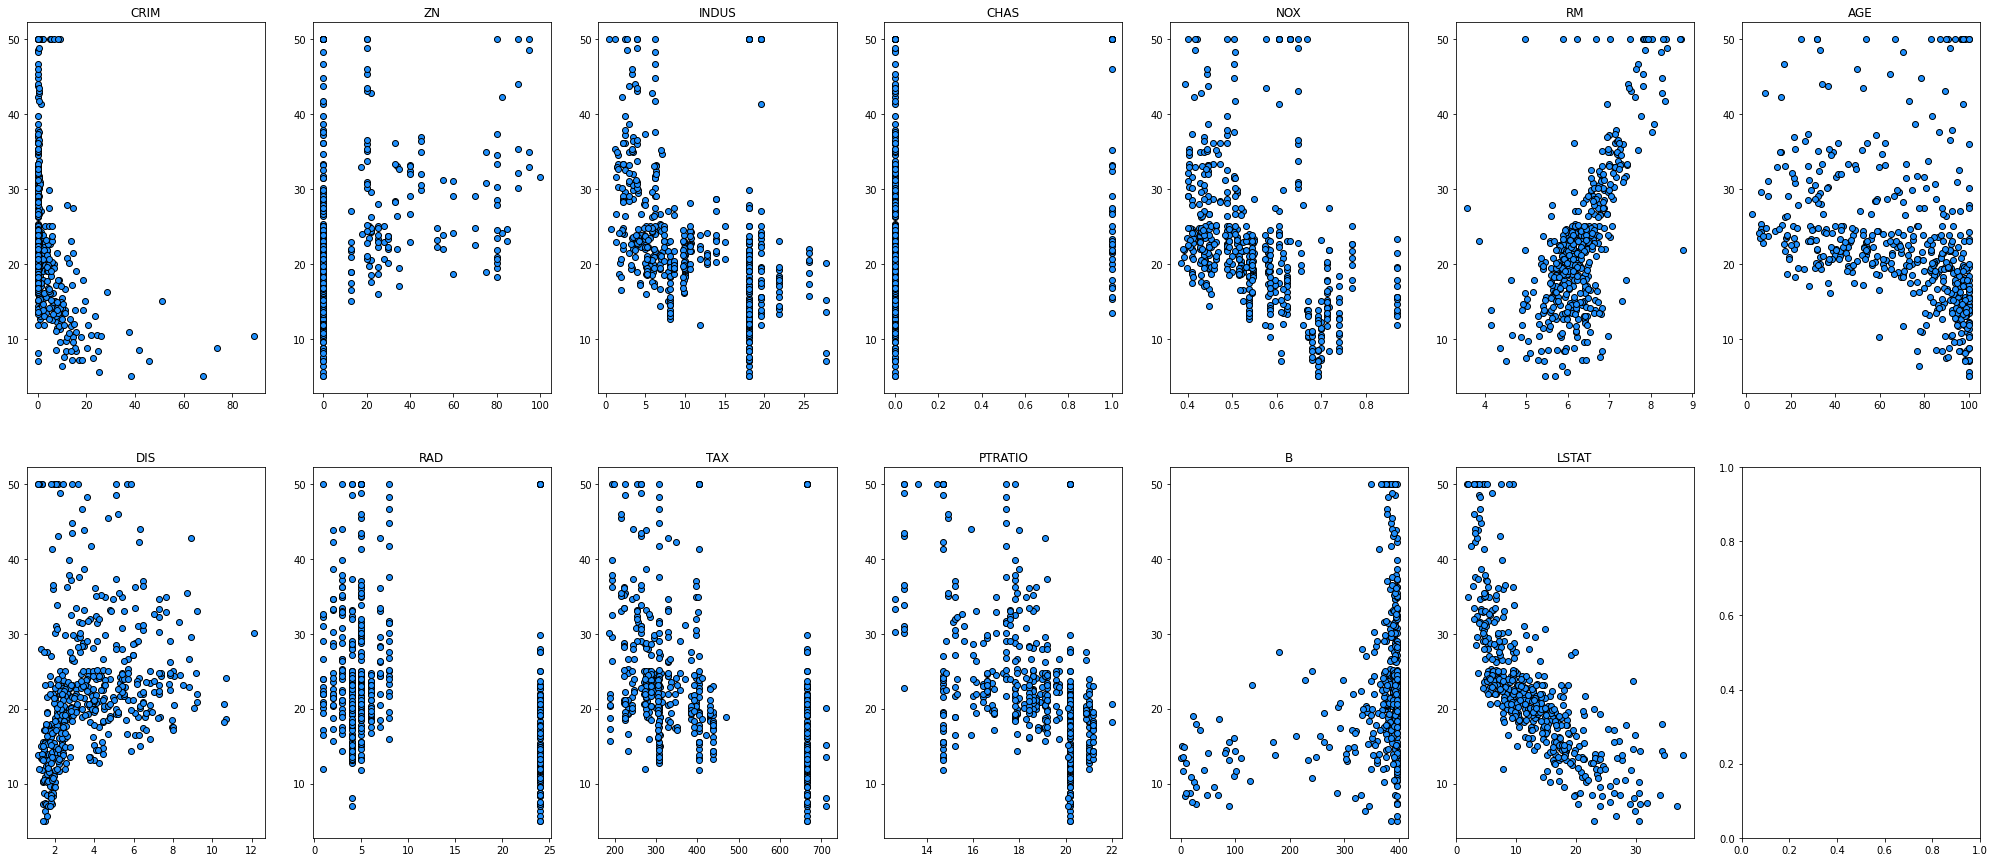

In [ ]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B','LSTAT']

fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(35,15))

for i,feature in enumerate(features):
  selector = (boston['feature_names'] == feature)
  ax[int(i/7.)][i%7].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  ax[int(i/7.)][i%7].set_title(feature)

Los atributos más informativos para la predicción serían los que poseen una relación "unívoca" entre x e y (que cada x sólo tome un valor de y y viceversa), o por lo menos que posean menor dispersión en el eje y.

Los atributos que poseen mayor información para la predicción son:


*   LSTAT
*   RM


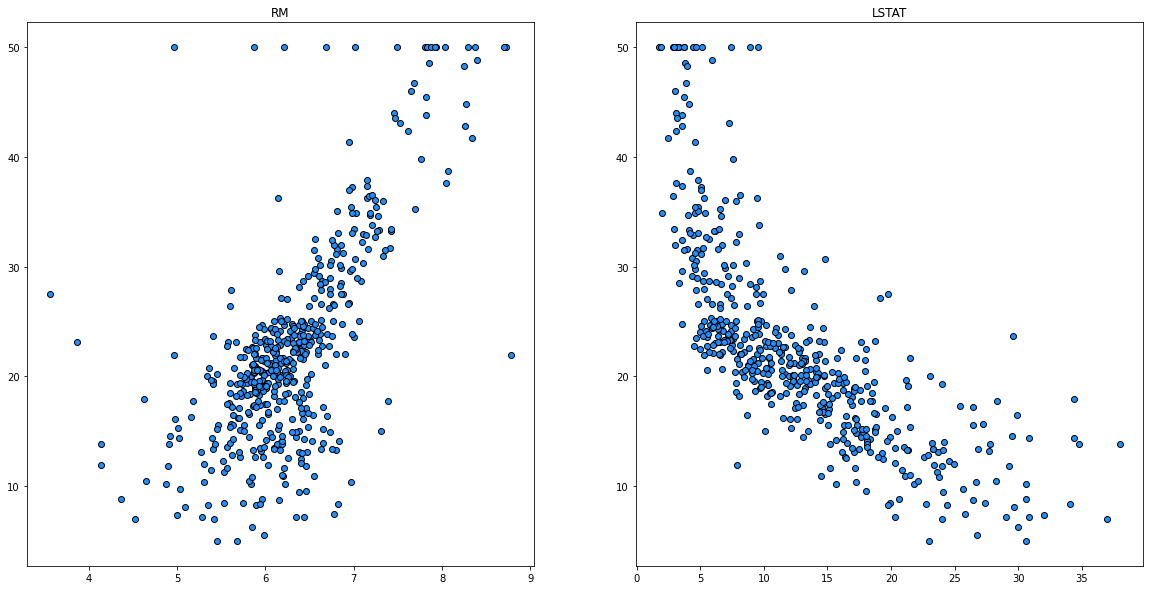

In [ ]:
features = ['RM','LSTAT']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i,feature in enumerate(features):
  selector = (boston['feature_names'] == feature)
  ax[i%2].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  ax[i%2].set_title(feature)

### 1.2 Correlación entre los datos

In [ ]:
df_boston = pd.DataFrame(X,columns=boston['feature_names'])

In [ ]:
corr = df_boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


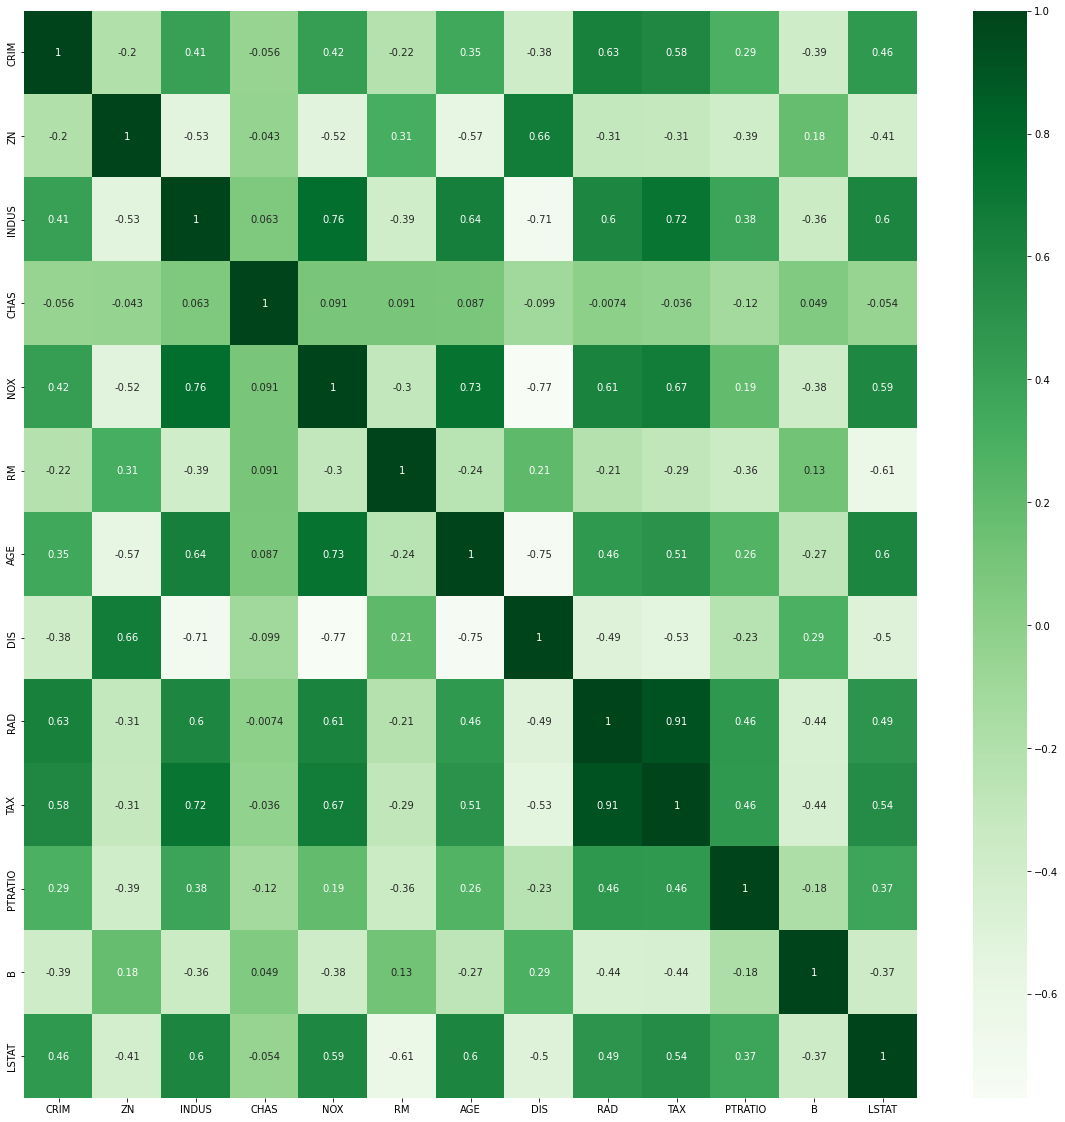

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Greens")
plt.show()

In [ ]:
corr.loc[:,:] =  np.tril(corr, k=-1)
corr_filtered = corr.stack()
corr_filtered = corr_filtered[abs(corr_filtered) > 0.7 ]
corr_filtered

NOX  INDUS    0.763651
AGE  NOX      0.731470
DIS  INDUS   -0.708027
     NOX     -0.769230
     AGE     -0.747881
TAX  INDUS    0.720760
     RAD      0.910228
dtype: float64

Podemos observar que muchas de las variables tienen tanto correlación directa como inversa con otras variables, por lo que sería posible agruparlas y quedarse con las de mayor información

Los grupos que se realizarán son:

* NOX - INDUS - AGE - DIS

* TAX - RAD

* RM - LSTAT

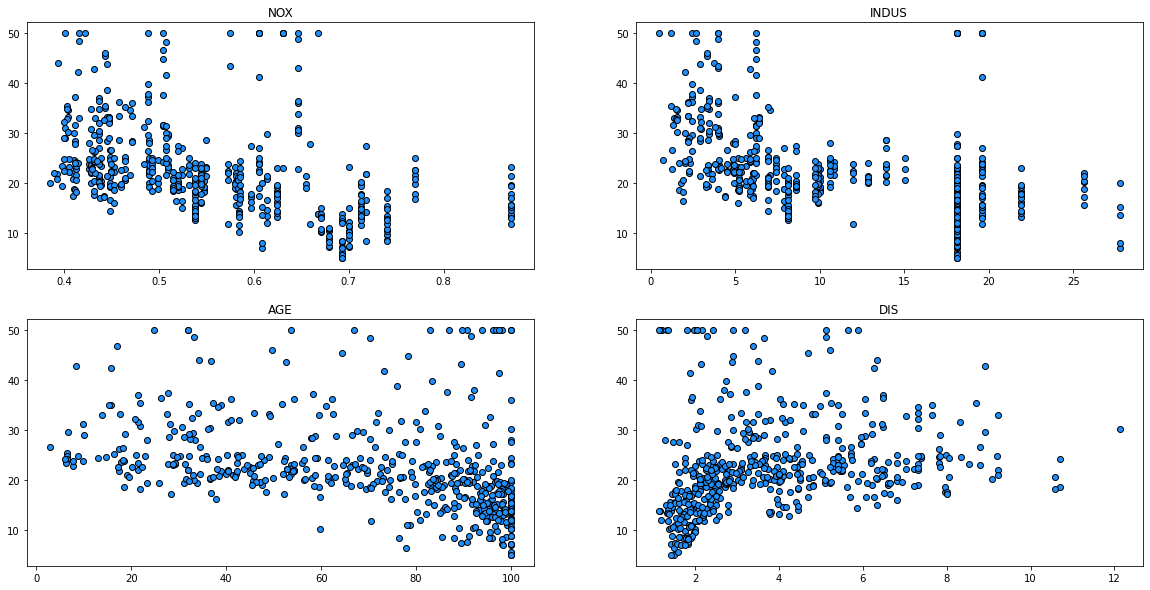

In [ ]:
features_1 = ['NOX','INDUS','AGE','DIS']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

for i,feature in enumerate(features_1):
  selector = (boston['feature_names'] == feature)
  ax[int(i/2)][i%2].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  ax[int(i/2)][i%2].set_title(feature)

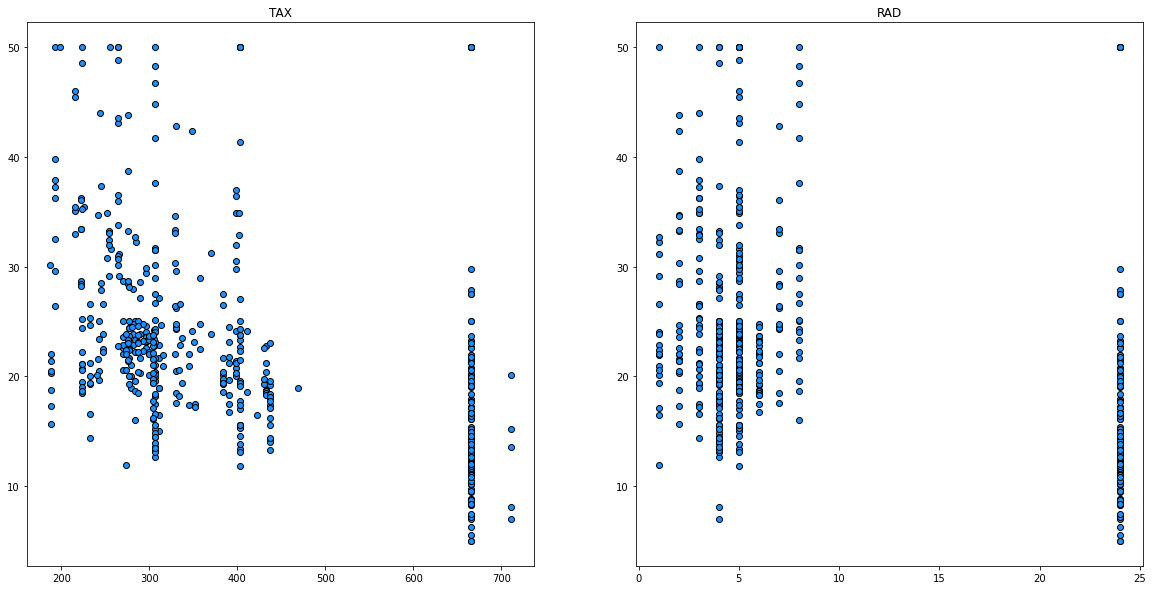

In [ ]:
features_2 = ['TAX','RAD']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i,feature in enumerate(features_2):
  selector = (boston['feature_names'] == feature)
  ax[i%2].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  ax[i%2].set_title(feature)

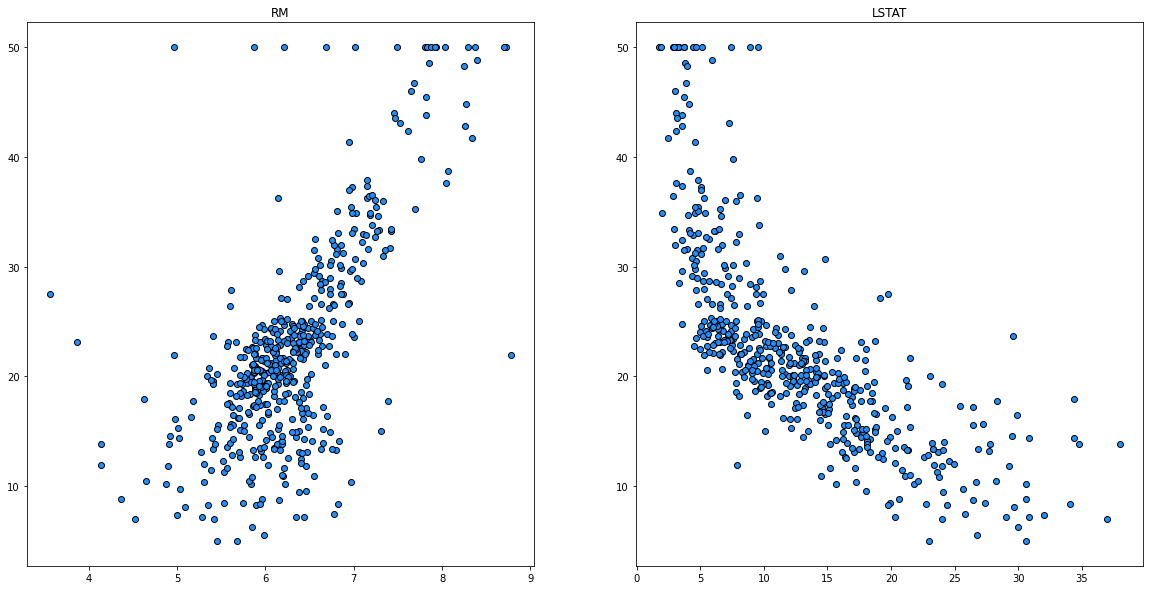

In [ ]:
features_3 = ['RM','LSTAT']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i,feature in enumerate(features_3):
  selector = (boston['feature_names'] == feature)
  ax[i%2].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  ax[i%2].set_title(feature)

## 1.3 Regresión Lineal

De los grupos de variables nos quedaremos con la que más información aporta a la salida.

In [ ]:
feature = 'LSTAT'  # selecciono el atributo 'LSAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape
#boston['LSAT']

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar acá.
from sklearn import datasets, linear_model

def train_model(X_train, y_train , feature):
  
  selector = (boston['feature_names'] == feature)
  
  # Create linear regression object
  regr = linear_model.LinearRegression()

  # Train the model using the training sets
  regr.fit(X_train[:,selector], y_train)

  # The coefficients
  print('Coefficients: \n', regr.coef_)
  print(regr.intercept_)

  # Grafico el ajuste lineal (con los puntos del entrenamiento)
  x_start = np.min(X_train[:,selector])
  x_end = np.max(X_train[:,selector])
  x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
  plt.plot(x, regr.predict(x), color="tomato", label="modelo", linewidth=3)


  plt.scatter(X_train[:,selector], y_train, facecolor="dodgerblue", edgecolor="k", label="train")
  plt.title(feature)
  plt.legend()
  plt.show()

  return regr

In [ ]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error, r2_score

def eval_model(regr, X_test, X_train, y_train, y_test, feature):

  selector = (boston['feature_names'] == feature)
  # Make predictions using the testing set
  y_pred = regr.predict(X_test[:,selector])
  y_pred_train = regr.predict(X_train[:,selector])

  # The mean squared error (train)
  print('Mean squared error (train): %.2f'
        % mean_squared_error(y_train, y_pred_train))

  # The mean squared error (test)
  print('Mean squared error (test): %.2f'
        % mean_squared_error(y_test, y_pred))

  print(' ')

  # The coefficient of determination: 1 is perfect prediction (train)
  print('Coefficient of determination (train): %.2f'
        % r2_score(y_train, y_pred_train))

  # The coefficient of determination: 1 is perfect prediction (test)
  print('Coefficient of determination (test): %.2f'
        % r2_score(y_test, y_pred))



GRUPO 1

Coefficients: 
 [-36.85600893]
43.099607431032126


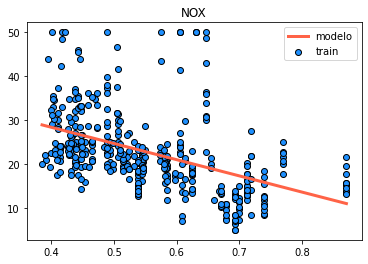

Mean squared error (train): 67.16
Mean squared error (test): 76.95
 
Coefficient of determination (train): 0.21
Coefficient of determination (test): 0.05
Coefficients: 
 [-0.6936726]
30.327907185831464


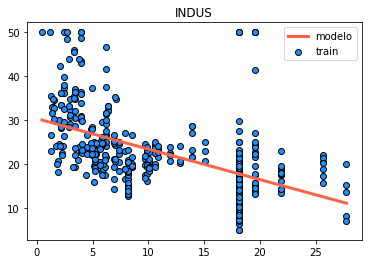

Mean squared error (train): 61.67
Mean squared error (test): 77.03
 
Coefficient of determination (train): 0.28
Coefficient of determination (test): 0.05
Coefficients: 
 [-0.13586519]
31.99027826324518


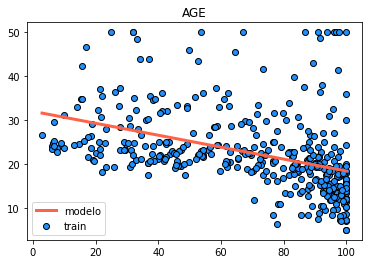

Mean squared error (train): 70.60
Mean squared error (test): 80.39
 
Coefficient of determination (train): 0.17
Coefficient of determination (test): 0.01
Coefficients: 
 [1.24783095]
17.907257039217154


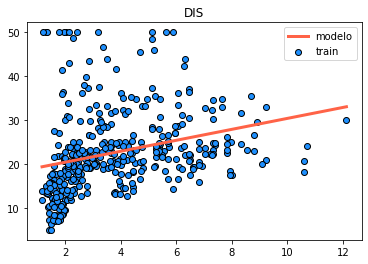

Mean squared error (train): 78.42
Mean squared error (test): 82.62
 
Coefficient of determination (train): 0.08
Coefficient of determination (test): -0.01


In [ ]:
for i in range(len(features_1)):
  regresor = train_model(X_train, y_train, features_1[i])
  eval_model(regresor, X_test, X_train, y_train, y_test, features_1[i])

GRUPO 2

Coefficients: 
 [-0.02763272]
33.74355775948019


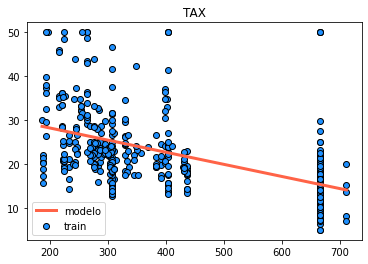

Mean squared error (train): 62.91
Mean squared error (test): 78.31
 
Coefficient of determination (train): 0.26
Coefficient of determination (test): 0.04
Coefficients: 
 [-0.45348583]
26.876219435360397


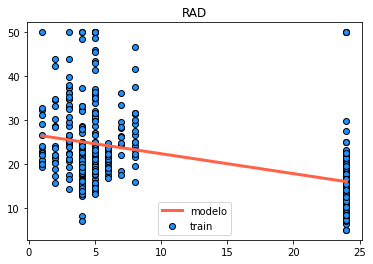

Mean squared error (train): 69.76
Mean squared error (test): 82.46
 
Coefficient of determination (train): 0.18
Coefficient of determination (test): -0.01


In [ ]:
for i in range(len(features_2)):
  regresor = train_model(X_train, y_train, features_2[i])
  eval_model(regresor, X_test, X_train, y_train, y_test, features_2[i])

GRUPO 3

Coefficients: 
 [9.37638431]
-36.476189627647315


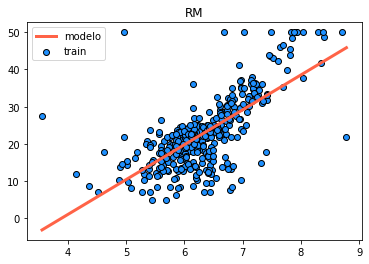

Mean squared error (train): 42.82
Mean squared error (test): 46.91
 
Coefficient of determination (train): 0.50
Coefficient of determination (test): 0.42
Coefficients: 
 [-0.95648761]
34.76519272372788


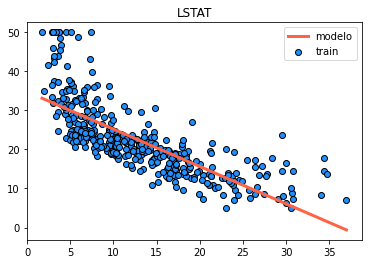

Mean squared error (train): 36.52
Mean squared error (test): 46.34
 
Coefficient of determination (train): 0.57
Coefficient of determination (test): 0.43


In [ ]:
for i in range(len(features_3)):
  regresor = train_model(X_train, y_train, features_3[i])
  eval_model(regresor, X_test, X_train, y_train, y_test, features_3[i])

## 2.0 Regresión con más de un Atributo

Se seleccionan las variables que más información a la salida de los grupos seleccionados en el punto 1.

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
#selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'TAX') | (boston['feature_names'] == 'AGE')
selector =  (boston['feature_names'] == 'RM') 
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 1), (102, 1))

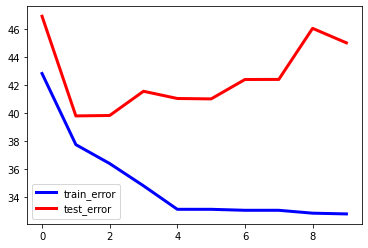

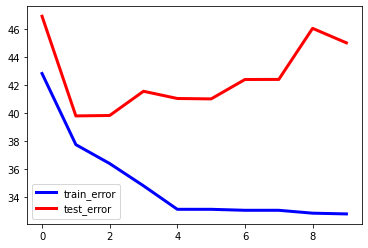

32.80188935118588 9
39.7947311637265 9


In [ ]:
# 2. Resolver acá.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errores = []
test_errores = []

for i in range(1,11):
  modelo =  make_pipeline(PolynomialFeatures(i), LinearRegression())
  modelo.fit(X_train_fs, y_train)
  y_train_pred  = modelo.predict(X_train_fs)
  y_test_pred  = modelo.predict(X_test_fs)
  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)
  train_errores.append(train_error)
  test_errores.append(test_error)

# Grafico error
plt.plot(train_errores, color="blue", label="train_error", linewidth=3)
plt.plot(test_errores, color="red", label="test_error", linewidth=3)
plt.legend()
plt.show()

# Grafico error
plt.plot(train_errores, color="blue", label="train_error", linewidth=3)
plt.plot(test_errores, color="red", label="test_error", linewidth=3)
plt.legend()
plt.show()

print(min(train_errores),min(range(len(train_errores)), key=train_errores.__getitem__))
print(min(test_errores),min(range(len(test_errores)), key=train_errores.__getitem__))

Considerando 3 atributos hemos encontrado que el polinomio de grado 3 es el que mejor ajusta. 

Analizando los errores obtenidos en los 3 casos para test:


*   3 atributos (polinomio de grado 4): 32.564
*   1 atributo (polinomio de grado 9): 39.794
*   1 atributo (regresión lineal): 46.21

llegamos a la conlusión que el mejor de estos 3 modelos es de 3 atributos seleccionados por grupo.


## 3.1 Version con red neuronal

Se realizará la estimación con un modelo de red neuronal

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(35), max_iter=10000,
                   activation='relu', random_state = 9,
                   solver='lbfgs')
model = regr.fit(X_train_fs, y_train)

In [ ]:
#  Predicción (predict):
Y_train_pred = model.predict(X_train_fs)
Y_test_pred = model.predict(X_test_fs)

    
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, Y_train_pred)
test_error_multiple = mean_squared_error(y_test, Y_test_pred)

In [ ]:
#y_test_filter = y_test
#Y_test_pred = Y_test_pred
y_test_filter = np.delete(y_test,[1,37]) # Trampa
Y_test_pred = np.delete(Y_test_pred,[1,37]) # Trampa

# Cálculo del error cuadrático medio sobre ambos conjuntos de datos (train y test)
train_error_multiple = mean_squared_error(y_train, Y_train_pred)
test_error_multiple = mean_squared_error(y_test_filter, Y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:36.3
Test error:21.9


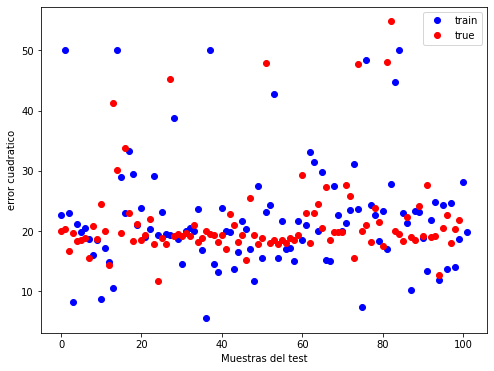

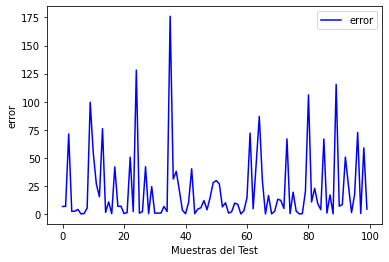

In [ ]:
# Gráfico de curvas de error
plt.figure(figsize=(8,6))

plt.plot(y_test, "bo", label="train")
plt.plot(Y_test_pred, "ro", label="true")
plt.legend()
plt.xlabel("Muestras del test")
plt.ylabel("error cuadratico")
plt.show()

difference = (y_test_filter - Y_test_pred)**2

for i in range(len(difference)):
  if (difference[i] > 500):
    print(i)

plt.plot(difference, "b", label="error")
plt.legend()
plt.xlabel("Muestras del Test")
plt.ylabel("error")
plt.show()

### Conclusiones

* Agrupar las variables y seleccionar las que más información daban nos permitieron reducir la cantidad de variables a procesar respecto a todas las del comienzo y además de obtener mejores resultados, el modelo de regresión polinomial nos permitió utilizar menos coeficientes en el polinomio.
* Luego, a través de un modelo de red neuronal, utilizando las variables seleccionadas, se obtuvo un error mucho menor de test(21.) respecto a los modelos probados anteriormente.
* La reducción de variables es de suma importancia para evitar el overfitting, agilizar el proceso y obtener modelos más compactos.